## Data format of a traffic scene

In this notebook, we'll dive into the data format used to create simulations in Nocturne. This example will help set the stage for future notebooks that'll cover imitation learning and reinforcement learning based on this data format.

_Last update: April 2023_

In [3]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cmap = ['r', 'g', 'b', 'y', 'c'] 
%config InlineBackend.figure_format = 'svg'
sns.set('notebook', font_scale=1.1, rc={'figure.figsize': (8, 3)})
sns.set_style('ticks', rc={'figure.facecolor': 'none', 'axes.facecolor': 'none'})

In [5]:
# Take an example scene
data_path = 'data/example_scenario.json'

with open(data_path) as file:
    traffic_scene = json.load(file)

In [ ]:
traffic_scene.keys()

dict_keys(['name', 'objects', 'roads', 'tl_states'])

### Global Overview 
A traffic scene consists of:
- `name`: the name of the traffic scenario.
- `objects`: the road objects or moving vehicles in the scene.
- `roads`: the road points in the scene, these are all the stationary objects.
- `tl_states`: the states of the traffic lights, which are filtered out for now. 

In [25]:
traffic_scene['tl_states']

{}

In [26]:
traffic_scene['name']

'tfrecord-00358-of-01000_65.json'

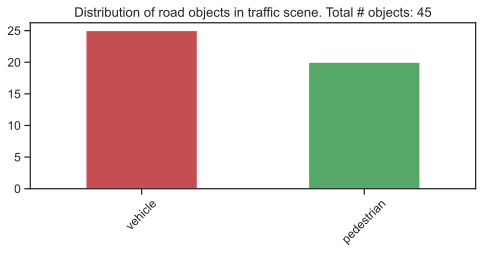

In [27]:
pd.Series(
    [
        traffic_scene['objects'][idx]['type']
        for idx in range(len(traffic_scene['objects']))
    ]
).value_counts().plot(kind='bar', rot=45, color=cmap);
plt.title(f'Distribution of road objects in traffic scene. Total # objects: {len(traffic_scene["objects"])}');

This traffic scenario only contains vehicles and pedestrians, some scenes have cyclists as well.

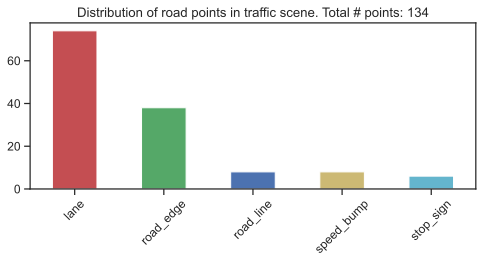

In [28]:
pd.Series(
    [
        traffic_scene['roads'][idx]['type']
        for idx in range(len(traffic_scene['roads']))
    ]
).value_counts().plot(kind='bar', rot=45, color=cmap);
plt.title(f'Distribution of road points in traffic scene. Total # points: {len(traffic_scene["roads"])}');

### In-Depth: Road Objects

This is a list of different road objects in the traffic scene. For each road object, we have information about its position, velocity, size, in which direction its heading, whether its a valid object, the type, and the final position of the vehicle.

In [29]:
# Take the first object
idx = 0

# For each object, we have this information:
traffic_scene['objects'][idx].keys()

dict_keys(['position', 'width', 'length', 'heading', 'velocity', 'valid', 'goalPosition', 'type'])

In [30]:
# Position contains the (x, y) coordinates for the vehicle at every time step
print(json.dumps(traffic_scene['objects'][idx]['position'][:10], indent=4))

[
    {
        "x": 9037.7138671875,
        "y": -2720.373779296875
    },
    {
        "x": 9037.7607421875,
        "y": -2720.306640625
    },
    {
        "x": 9037.822265625,
        "y": -2720.217529296875
    },
    {
        "x": 9037.8916015625,
        "y": -2720.146240234375
    },
    {
        "x": 9037.9482421875,
        "y": -2720.070068359375
    },
    {
        "x": 9038.01953125,
        "y": -2719.994384765625
    },
    {
        "x": 9038.1005859375,
        "y": -2719.903076171875
    },
    {
        "x": 9038.1953125,
        "y": -2719.830810546875
    },
    {
        "x": 9038.279296875,
        "y": -2719.74462890625
    },
    {
        "x": 9038.3564453125,
        "y": -2719.674560546875
    }
]


In [31]:
# Width and length together make the size of the object, and is used to see if there is a collision 
traffic_scene['objects'][idx]['width'], traffic_scene['objects'][idx]['length'] 

(0.6877052187919617, 0.6777269244194031)

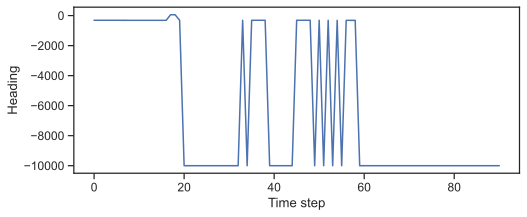

In [32]:
# Heading is the direction in which the vehicle is pointing 
plt.plot(traffic_scene['objects'][idx]['heading']);
plt.xlabel('Time step')
plt.ylabel('Heading');

In [33]:
# Velocity shows the velocity in the x- and y- directions
print(json.dumps(traffic_scene['objects'][idx]['velocity'][:10], indent=4))

[
    {
        "x": 0.634765625,
        "y": 0.72265625
    },
    {
        "x": 0.46875,
        "y": 0.67138671875
    },
    {
        "x": 0.615234375,
        "y": 0.89111328125
    },
    {
        "x": 0.693359375,
        "y": 0.712890625
    },
    {
        "x": 0.56640625,
        "y": 0.76171875
    },
    {
        "x": 0.712890625,
        "y": 0.7568359375
    },
    {
        "x": 0.810546875,
        "y": 0.9130859375
    },
    {
        "x": 0.947265625,
        "y": 0.72265625
    },
    {
        "x": 0.83984375,
        "y": 0.86181640625
    },
    {
        "x": 0.771484375,
        "y": 0.70068359375
    }
]


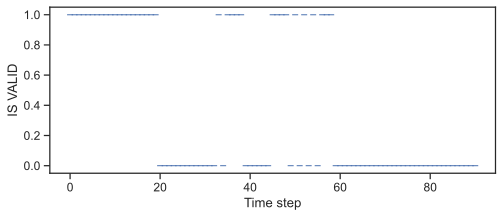

In [34]:
# Valid indicates if the feature is valid (TODO: meaning?)
plt.xlabel('Time step')
plt.ylabel('IS VALID');
plt.plot(traffic_scene['objects'][idx]['valid'], '_', lw=5);

In [35]:
# Each object has a goalPosition, an (x, y) position within the scene
traffic_scene['objects'][idx]['goalPosition']

{'x': 9041.1259765625, 'y': -2716.647216796875}

In [36]:
# Finally, we have the type of the vehicle
traffic_scene['objects'][idx]['type']

'pedestrian'

### In-Depth: Road Points

Road points are static objects in the scene.

In [37]:
traffic_scene['roads'][idx].keys()

dict_keys(['geometry', 'type'])

In [38]:
# This point represents the edge of a road
traffic_scene['roads'][idx]['type']

'road_edge'

In [39]:
# Geometry contains the (x, y) position(s) for a road point
# Note that this will be a list for road lanes and edges but a single (x, y) tuple for stop signs and alike
print(json.dumps(traffic_scene['roads'][idx]['geometry'][:10], indent=4));

[
    {
        "x": 8922.911733810946,
        "y": -2849.426741530589
    },
    {
        "x": 8923.216436260553,
        "y": -2849.038518766975
    },
    {
        "x": 8923.50673911804,
        "y": -2848.63941352788
    },
    {
        "x": 8923.782254084921,
        "y": -2848.2299596442986
    },
    {
        "x": 8924.042612639492,
        "y": -2847.8107047886665
    },
    {
        "x": 8924.287466537296,
        "y": -2847.382209743547
    },
    {
        "x": 8924.516488266596,
        "y": -2846.945047650609
    },
    {
        "x": 8924.729371495881,
        "y": -2846.49980324385
    },
    {
        "x": 8924.91688626026,
        "y": -2846.067714357487
    },
    {
        "x": 8925.087545312272,
        "y": -2845.6286986979553
    }
]
